# Semester Projekt Big Data Engineering
### Gruppe 7: Dominic Kalarickal, Marcel Ivanic, Konrad Konlechner

## Grundlegendes Konzept:

Es sollen Verkehrsdaten von unterschiedlichen Quellen miteinander verglichen werden, um die Daten zu validieren. Hierbei soll insbesondere ein Ranking verschiedener Städte weltweit dahingehend überprüft werden, ob sich dieses durch Abfragen der Daten von einer Routing-API unter Berücksichtigung der aktuellen Verkehrslage bestätigen lässt. Außerdem werden diese Daten noch einem Index gegenübergestellt, der das Auftreten von Verkehrsstaus bewertet.


![title](img/bde_final_project_group_7_overview.png)

## Github-Repository:
Dieses Notebook und andere relevante Daten befinden sich in folgendem Github-Repository:  
https://github.com/Primestyler/BDE_proj.git

## Docker Setup
Mit Hilfe des beiliegenden Files "docker-compose.yml" können die entsprechden Docker-Container erstellt werden, die zur Ausführung dieses Notebooks benötigt werden.


## Installation benötigter Packages

In [1]:
!pip install confluent-kafka
!pip install pyspark

## Vorbereitung der Routen-Daten
Für jede Route erfolgt die Angabe der Koordinaten von Start- und Zielpunkt

Wir haben verschiedene Routen in den Städten Berlin, Delhi und London beschrieben. Jede Route haben wir durch zwei Koordinatenpaare gekennzeichnet: ein "start" Punkt und ein "ziel" Punkt. Diese Koordinatenpaare sind geografische Positionen, angegeben in Längen- und Breitengraden, die die Start- und Zielorte der Routen definieren. In Berlin haben wir die Routen aus mehreren Start- und Zielkoordinaten innerhalb der Stadt zusammengestellt. Ähnlich wie in Berlin haben wir in Delhi verschiedene Start- und Zielpunkte innerhalb der Stadt durch Koordinatenpaare dargestellt. Auch in London haben wir verschiedene Routen durch Start- und Zielkoordinaten in der Stadt beschrieben.

In [2]:
# Routes data
berlin_routen = [
    {"start": "52.5160,13.3779", "ziel": "52.5206,13.3862"},
    {"start": "52.5308,13.3847", "ziel": "52.5264,13.3686"},
    {"start": "52.5233,13.4127", "ziel": "52.5171,13.3889"},
    {"start": "52.5411,13.4554", "ziel": "52.5200,13.4050"},
    {"start": "52.4831,13.4516", "ziel": "52.5209,13.3867"},
    {"start": "52.5109,13.4245", "ziel": "52.5345,13.3832"},
    {"start": "52.5064,13.2895", "ziel": "52.5167,13.3774"},
    {"start": "52.5377,13.4384", "ziel": "52.4985,13.4451"},
    {"start": "52.4660,13.3483", "ziel": "52.5327,13.4217"},
    {"start": "52.5489,13.3781", "ziel": "52.4960,13.3311"},
    {"start": "52.5096,13.3763", "ziel": "52.5192,13.4061"},
    {"start": "52.4973,13.3966", "ziel": "52.5074,13.4307"},
    {"start": "52.5238,13.4023", "ziel": "52.5080,13.3772"},
    {"start": "52.5179,13.4284", "ziel": "52.5054,13.3904"},
    {"start": "52.5120,13.3889", "ziel": "52.5208,13.3856"},
    {"start": "52.5200,13.4050", "ziel": "52.5248,13.3689"},
    {"start": "52.5170,13.3889", "ziel": "52.5200,13.4050"},
    {"start": "52.5240,13.3879", "ziel": "52.5300,13.4100"},
    {"start": "52.5290,13.3700", "ziel": "52.5200,13.4050"},
    {"start": "52.5150,13.3750", "ziel": "52.5300,13.4050"},
    {"start": "52.5220,13.3880", "ziel": "52.5200,13.4050"},
    {"start": "52.5270,13.3720", "ziel": "52.5150,13.4050"},
    {"start": "52.5240,13.3600", "ziel": "52.5200,13.4050"},
    {"start": "52.5230,13.3700", "ziel": "52.5200,13.4050"},
    {"start": "52.5250,13.3780", "ziel": "52.5200,13.4050"}
]

delhi_routen = [
    {"start": "28.7041,77.1025", "ziel": "28.6139,77.2090"},
    {"start": "28.7041,77.1025", "ziel": "28.6353,77.2250"},
    {"start": "28.6271,77.2166", "ziel": "28.6518,77.2219"},
    {"start": "28.6325,77.2185", "ziel": "28.6817,77.2426"},
    {"start": "28.5922,77.2507", "ziel": "28.5383,77.2595"},
    {"start": "28.5801,77.0569", "ziel": "28.6334,77.2200"},
    {"start": "28.6271,77.2150", "ziel": "28.5666,77.2044"},
    {"start": "28.6506,77.2305", "ziel": "28.6143,77.2274"},
    {"start": "28.6090,77.0375", "ziel": "28.6947,77.2945"},
    {"start": "28.5694,77.2315", "ziel": "28.6613,77.2166"},
    {"start": "28.6139,77.2090", "ziel": "28.6344,77.2205"},
    {"start": "28.6333,77.2250", "ziel": "28.6139,77.2025"},
    {"start": "28.5914,77.2507", "ziel": "28.7025,77.1907"},
    {"start": "28.5552,77.2026", "ziel": "28.7041,77.1025"},
    {"start": "28.6280,77.2145", "ziel": "28.5790,77.1762"},
    {"start": "28.6280,77.2150", "ziel": "28.6340,77.2160"},
    {"start": "28.6180,77.2080", "ziel": "28.6220,77.2140"},
    {"start": "28.6110,77.2090", "ziel": "28.6300,77.2210"},
    {"start": "28.6190,77.2110", "ziel": "28.6250,77.2170"},
    {"start": "28.6270,77.2130", "ziel": "28.6310,77.2190"},
    {"start": "28.6300,77.2160", "ziel": "28.6210,77.2150"},
    {"start": "28.6220,77.2180", "ziel": "28.6290,77.2230"},
    {"start": "28.6250,77.2100", "ziel": "28.6320,77.2240"},
    {"start": "28.6140,77.2140", "ziel": "28.6200,77.2190"},
    {"start": "28.6150,77.2150", "ziel": "28.6220,77.2160"}
]

london_routen = [
    {"start": "51.5074,-0.1278", "ziel": "51.5007,-0.1246"},
    {"start": "51.5074,-0.1278", "ziel": "51.5080,-0.1280"},
    {"start": "51.5014,-0.1419", "ziel": "51.5033,-0.1195"},
    {"start": "51.5113,-0.1195", "ziel": "51.4992,-0.1247"},
    {"start": "51.4989,-0.1747", "ziel": "51.5005,-0.1213"},
    {"start": "51.5080,-0.1246", "ziel": "51.5045,-0.0865"},
    {"start": "51.5000,-0.1214", "ziel": "51.5101,-0.1349"},
    {"start": "51.5085,-0.0805", "ziel": "51.4947,-0.1374"},
    {"start": "51.4975,-0.1214", "ziel": "51.5074,-0.1278"},
    {"start": "51.5125,-0.0961", "ziel": "51.5074,-0.1278"},
    {"start": "51.5026,-0.1406", "ziel": "51.5097,-0.0805"},
    {"start": "51.5286,-0.2417", "ziel": "51.5042,-0.0865"},
    {"start": "51.5204,-0.1346", "ziel": "51.5094,-0.1183"},
    {"start": "51.5096,-0.1348", "ziel": "51.5014,-0.1423"},
    {"start": "51.5048,-0.1070", "ziel": "51.5081,-0.1246"},
    {"start": "51.5070,-0.1350", "ziel": "51.5110,-0.1200"},
    {"start": "51.5130,-0.1400", "ziel": "51.5060,-0.1210"},
    {"start": "51.5080,-0.1320", "ziel": "51.5090,-0.1190"},
    {"start": "51.5050,-0.1380", "ziel": "51.5070,-0.1240"},
    {"start": "51.5090,-0.1400", "ziel": "51.5060,-0.1250"},
    {"start": "51.5075,-0.1330", "ziel": "51.5050,-0.1190"},
    {"start": "51.5110,-0.1360", "ziel": "51.5080,-0.1220"},
    {"start": "51.5090,-0.1390", "ziel": "51.5070,-0.1180"},
    {"start": "51.5100,-0.1320", "ziel": "51.5080,-0.1200"},
    {"start": "51.5060,-0.1380", "ziel": "51.5070,-0.1210"}
]

In [3]:
import requests
import json
import time
from json import dumps
import math 

Wir haben eine Funktion entwickelt, um die Länge von Routen auf etwa 10 Kilometer anzupassen. Diese Funktion, **adjust_route**, nimmt eine Route mit Start- und Zielkoordinaten als Eingabe. Zunächst wandeln wir die Koordinaten von Zeichenketten in Fließkommazahlen um und berechnen dann die aktuelle Distanz zwischen den Start- und Zielpunkten mithilfe der Haversine-Formel in der Hilfsfunktion **distance_between_points**. Diese Formel berücksichtigt die Erdkrümmung und liefert die Entfernung in Kilometern.

Wenn die aktuelle Länge der Route von der gewünschten Länge abweicht, skalieren wir den Vektor vom Start- zum Zielpunkt so, dass die neue Route die gewünschte Länge von 10 Kilometern hat. Dazu berechnen wir einen Skalierungsfaktor aus dem Verhältnis der gewünschten Länge zur aktuellen Länge. Die neuen Zielkoordinaten erhalten wir, indem wir die Differenz zwischen den ursprünglichen Start- und Zielkoordinaten mit diesem Faktor multiplizieren und die resultierenden Werte zu den Startkoordinaten addieren. Die angepassten Koordinaten setzen wir als neues Ziel der Route fest. Diese Methode ermöglicht es uns, Routen einheitlich auf die Länge von etwa 10 Kilometern zu bringen, was für die Analyse von Verkehrswegen, Routenplanung oder logistische Optimierungen hilfreich ist.

In [4]:
# Function to adjust route to fit the desired length (approximately 10 km)
def adjust_route(route):
    start_coords = [float(coord) for coord in route['start'].split(',')]
    ziel_coords = [float(coord) for coord in route['ziel'].split(',')]
    
    # Calculate the distance between start and ziel
    current_length = distance_between_points(start_coords, ziel_coords)
    desired_length = 10.0  # Desired length in km
    
    # Scale the vector from start to ziel to achieve desired_length
    scale_factor = desired_length / current_length
    new_ziel_coords = [
        start_coords[0] + (ziel_coords[0] - start_coords[0]) * scale_factor,
        start_coords[1] + (ziel_coords[1] - start_coords[1]) * scale_factor
    ]
    
    route['ziel'] = f"{new_ziel_coords[0]},{new_ziel_coords[1]}"
    return route

# Helper function to calculate distance between two points in km (Haversine formula)
def distance_between_points(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371.0  # Radius of the Earth in km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

## Abfragen der Routen von der Here-API 

In [5]:
# Kafka producer setup
from confluent_kafka import Producer

kafkaProducer = Producer({'bootstrap.servers': 'kafka:9092'})

Wir haben eine Methode entwickelt, um Routeninformationen von der HERE API abzurufen. Hierzu haben wir zunächst die API-URL und den API-Schlüssel definiert.

Die Funktion **get_data_from_here_api** nimmt Start- und Zielkoordinaten als Eingaben und stellt eine Anfrage an die HERE API, um Routeninformationen zu erhalten. In den Anfragenparametern spezifizieren wir das Transportmittel als Auto, geben die Start- und Zielkoordinaten an und fordern die Zusammenfassung der Route an. Die API antwortet mit den entsprechenden Routeninformationen, die wir dann im JSON-Format zurückgeben. Diese Methode ermöglicht es uns, detaillierte Routeninformationen für unsere Analysen zu sammeln.

In [6]:
# HERE API setup
api_url = "https://router.hereapi.com/v8/routes"
api_key = "AtlHVpOjqsf6aI0Ik-Fd6kvsRb3AHEwIv7QNo_iEeZM"

# Function to get data from HERE API with a desired length constraint
def get_data_from_here_api(start, ziel):
    params = {
        "transportMode": "car",
        "origin": start,
        "destination": ziel,
        "return": "summary",
        "apikey": api_key
    }
    response = requests.get(api_url, params=params)
    data = response.json()
    return data


## Senden der Routen-Daten an Kafka-Topics

Wir haben eine Funktion entwickelt, um Routen zu verarbeiten und die Daten an Kafka zu senden. Die Funktion **send_routes_to_kafka** iteriert durch eine Liste von Routen, passt jede Route auf eine Länge von etwa 10 Kilometern an und ruft dann Routeninformationen von der HERE API ab.

Für jede Route extrahieren wir die Start- und Zielkoordinaten und verwenden diese, um Daten von der HERE API zu erhalten. Die erhaltenen Daten werden dann im JSON-Format an ein Kafka-Thema gesendet. Um zu vermeiden, dass wir die API-Rate-Limits überschreiten, fügen wir eine kurze Pause zwischen den Anfragen ein. Diese Funktion wird verwendet, um die Routeninformationen für Berlin, Delhi und London zu verarbeiten und an die entsprechenden Kafka-Themen zu senden.

In [7]:
# Function to process routes and send data to Kafka
def send_routes_to_kafka(routes, topic_name):
    for route in routes:
        route = adjust_route(route)
        start = route["start"]
        ziel = route["ziel"]
        data = get_data_from_here_api(start, ziel)
        kafkaProducer.produce(topic_name, value=dumps(data).encode('utf-8'))        
        print(f"Sent data for route from {start} to {ziel}")
        time.sleep(1)  # To avoid hitting API rate limits

In [8]:
# execute this code only if data has not already been sent to Kafka

# Send Berlin routes data to Kafka
send_routes_to_kafka(berlin_routen, 'berlin_routes')

# Send Delhi routes data to Kafka
send_routes_to_kafka(delhi_routen, 'delhi_routes')

# Send London routes data to Kafka
send_routes_to_kafka(london_routen, 'london_routes')

Wir haben eine Methode entwickelt, um Kafka-Themen zu erstellen und aufzulisten. Wir haben die Konfiguration für die Kafka-Verbindung festgelegt und einen Admin-Client (kadmin) erstellt.

Die Themen für Berlin, Delhi und London wurden definiert, aber derzeit sind die entsprechenden Zeilen auskommentiert. Um die Themen zu erstellen, müssten diese Zeilen aktiviert werden. Schließlich haben wir die vorhandenen Kafka-Themen aufgelistet. Dieser Ansatz erleichtert die Verwaltung der Kafka-Themen für die Routeninformationen.

In [9]:
# create and list topics
from confluent_kafka.admin import AdminClient
from confluent_kafka.admin import NewTopic

# topics will also be created by producer when sending messages to a new topic
#topic_berlin = NewTopic('berlin_routes')
#topic_dehli = NewTopic('dehli_routes')
#topic_london = NewTopic('london_routes')

conf = {'bootstrap.servers': 'kafka:9092',
        'group.id': 'routes'}

kadmin = AdminClient(conf)
#kadmin.create_topics([topic_berlin, topic_dehli, topic_london])
kadmin.list_topics().topics

{'london_routes': TopicMetadata(london_routes, 1 partitions),
 'berlin_routes': TopicMetadata(berlin_routes, 1 partitions),
 'delhi_routes': TopicMetadata(delhi_routes, 1 partitions)}

Wir haben eine Pipeline erstellt, um Routeninformationen von Kafka mit Apache Spark zu verarbeiten und zu analysieren. Zuerst haben wir die Verbindungseinstellungen für Kafka festgelegt, einschließlich des Kafka-Brokers und der zu abonnierenden Topics, die die Routeninformationen für Berlin, Delhi und London enthalten.

Dann initialisierten wir eine Spark-Session und konfigurierten sie, um das Kafka-Spark-Streaming-Paket zu verwenden. Wir definierten ein Schema für die JSON-Daten, die von Kafka empfangen werden, um die Struktur der Routeninformationen zu beschreiben. Dieses Schema umfasst verschiedene Felder wie Längen- und Breitengrade, Zeitstempel und Zusammenfassungen der Routen.

Wir haben die Roh-Daten aus den Kafka-Topics gelesen und eine zusätzliche Spalte für den Namen des Topics hinzugefügt. Anschließend haben wir den Wert der Kafka-Nachrichten in Strings umgewandelt und das JSON-Format geparst. Um die Datenstruktur zu vereinfachen, haben wir die Routen und Abschnitte neu aufgegliedert, wodurch eine flachere Tabelle entstand.

Die resultierende Tabelle enthält detaillierte Informationen zu jeder Route und jedem Abschnitt, einschließlich Start- und Zielkoordinaten, Abfahrts- und Ankunftszeiten, Dauer, Länge und Transportmodus. Wir haben die aufbereiteten Daten angezeigt und eine Beispielanalyse durchgeführt, um die durchschnittliche Dauer der Routen pro Stadt zu berechnen.

Zum Abschluss der Verarbeitung haben wir die Spark-Session gestoppt. Diese Pipeline ermöglicht eine effiziente Verarbeitung und Analyse großer Mengen an Routeninformationen aus verschiedenen Städten in Echtzeit.

## Erstellen einer Spark-Session und Lesen des Streams der Kafka-Topics

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Kafka connection settings
kafka_bootstrap_servers = "kafka:9092"

kafka_topics = ["berlin_routes", "delhi_routes", "london_routes"]

# Initialize Spark session
spark = SparkSession.builder \
    .appName("KafkaSparkStreaming") \
    .config("spark.jars.packages", "org.apache.spark:spark-sql-kafka-0-10_2.12:3.3.0") \
    .getOrCreate()

# Define schema for the JSON data
location_schema = StructType([
    StructField("lat", FloatType(), True),
    StructField("lng", FloatType(), True)
])

place_schema = StructType([
    StructField("type", StringType(), True),
    StructField("location", location_schema, True),
    StructField("originalLocation", location_schema, True)
])

time_place_schema = StructType([
    StructField("time", StringType(), True),
    StructField("place", place_schema, True)
])

summary_schema = StructType([
    StructField("duration", IntegerType(), True),
    StructField("length", IntegerType(), True),
    StructField("baseDuration", IntegerType(), True)
])

transport_schema = StructType([
    StructField("mode", StringType(), True)
])

section_schema = StructType([
    StructField("id", StringType(), True),
    StructField("type", StringType(), True),
    StructField("departure", time_place_schema, True),
    StructField("arrival", time_place_schema, True),
    StructField("summary", summary_schema, True),
    StructField("transport", transport_schema, True)
])

route_schema = StructType([
    StructField("id", StringType(), True),
    StructField("sections", ArrayType(section_schema), True)
])

data_schema = StructType([
    StructField("routes", ArrayType(route_schema), True)
])

# Read raw data from Kafka topics
df_raw = spark.read.format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", ",".join(kafka_topics)) \
    .load()

# Add a column for the topic name
df_raw = df_raw.withColumn("topic", col("topic"))


# Convert value column to string and parse JSON
df_parsed = df_raw.select(from_json(col("value").cast("string"), data_schema).alias("data"), col("topic"))

# Explode routes and sections to flatten the structure
df_exploded = df_parsed.selectExpr("explode(data.routes) as route", "topic") \
    .selectExpr("route.id as route_id", "explode(route.sections) as section", "topic") \
    .select(
        col("route_id"),
        col("section.id").alias("section_id"),
        col("section.type").alias("section_type"),
        col("section.departure.time").alias("departure_time"),
        col("section.departure.place.location.lat").alias("departure_lat"),
        col("section.departure.place.location.lng").alias("departure_lng"),
        col("section.arrival.time").alias("arrival_time"),
        col("section.arrival.place.location.lat").alias("arrival_lat"),
        col("section.arrival.place.location.lng").alias("arrival_lng"),
        col("section.summary.duration").alias("duration"),
        col("section.summary.length").alias("length"),
        col("section.summary.baseDuration").alias("base_duration"),
        col("section.transport.mode").alias("transport_mode"),
        col("topic")
    )


# Show the parsed and flattened data
df_exploded.show(truncate=False)

# Example analysis: average duration per city
df_avg_duration = df_exploded.groupBy("topic").agg(avg("duration").alias("avg_duration"))
df_avg_duration.toPandas()

# Save the exploded dataframe to a CSV file
#df_exploded.write.csv("traffic_3.csv", header=True)


+------------------------------------+------------------------------------+------------+-------------------------+-------------+-------------+-------------------------+-----------+-----------+--------+------+-------------+--------------+-------------+
|route_id                            |section_id                          |section_type|departure_time           |departure_lat|departure_lng|arrival_time             |arrival_lat|arrival_lng|duration|length|base_duration|transport_mode|topic        |
+------------------------------------+------------------------------------+------------+-------------------------+-------------+-------------+-------------------------+-----------+-----------+--------+------+-------------+--------------+-------------+
|41cee05e-55ac-4418-a03b-a139d8bdd180|12f939d9-c4b6-48d9-a4e9-df37ab32a0c3|vehicle     |2024-06-27T16:40:14+01:00|51.507427    |-0.1280207   |2024-06-27T17:19:35+01:00|51.42105   |-0.0869301 |2361    |12090 |1695         |car           |london_

,topic,avg_duration
0,london_routes,2988.04
1,delhi_routes,2201.04
2,berlin_routes,1963.28


Mit der toPandas() Funktion haben wir unseren Spark-DataFrame in einen Pandas-Dataframe umgewandelt, um damit einfacher Analysen durchführen zu können.

In [11]:
df_exploded.toPandas()

,route_id,section_id,section_type,departure_time,departure_lat,departure_lng,arrival_time,arrival_lat,arrival_lng,duration,length,base_duration,transport_mode,topic
0,41cee05e-55ac-4418-a03b-a139d8bdd180,12f939d9-c4b6-48d9-a4e9-df37ab32a0c3,vehicle,2024-06-27T16:40:14+01:00,51.507427,-0.128021,2024-06-27T17:19:35+01:00,51.421051,-0.086930,2361,12090,1695,car,london_routes
1,cc259a4e-92f3-4e44-a0d5-287167b02a03,2591d039-a9ae-461d-9f79-b170dceca5a9,vehicle,2024-06-27T16:40:16+01:00,51.507427,-0.128021,2024-06-27T17:28:23+01:00,51.595100,-0.157134,2887,13331,1867,car,london_routes
2,3387c448-8011-435f-abca-98963df976d7,93b06112-bec8-42b5-a824-489759651035,vehicle,2024-06-27T16:40:17+01:00,51.502171,-0.141570,2024-06-27T17:22:56+01:00,51.513523,0.001297,2559,12272,1599,car,london_routes
3,433e87de-5bf0-4a14-a6c2-44142a0e033c,5459ddf5-51f4-428e-9b40-82be665c4f2a,vehicle,2024-06-27T16:40:18+01:00,51.511219,-0.119432,2024-06-27T17:24:33+01:00,51.424458,-0.156809,2655,13787,1724,car,london_routes
4,742a3d42-4933-4b13-aeac-da17d91b6491,7a500ec3-3e10-413b-8c87-eab57401527c,vehicle,2024-06-27T16:40:20+01:00,51.498932,-0.174234,2024-06-27T17:27:26+01:00,51.502468,-0.033320,2826,13346,1973,car,london_routes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,32f194b4-c0a6-494b-9cef-27e115059358,dc8233d5-642f-4411-9f21-e82c5c1a0ec2,vehicle,2024-06-27T17:39:36+02:00,52.522003,13.388041,2024-06-27T18:07:19+02:00,52.509830,13.532440,1663,11146,1140,car,berlin_routes
71,c87253c3-ac5d-4e3d-9bb8-636b52252a3e,10df0c82-e8bc-4b79-ad0e-b348410cc51c,vehicle,2024-06-27T17:39:37+02:00,52.526981,13.371725,2024-06-27T18:11:22+02:00,52.480438,13.501100,1905,12128,1273,car,berlin_routes
72,deff2c81-7342-4769-a8ed-4e99b62f9f37,8d3fd9b0-00a1-4459-9e9a-46478507e2e7,vehicle,2024-06-27T17:39:38+02:00,52.524147,13.360482,2024-06-27T18:14:01+02:00,52.510658,13.506202,2063,12309,1377,car,berlin_routes
73,71c1f090-ebb7-4e0c-9d82-c2f949a34de2,7275b6b2-1730-4041-8db8-5ec9f19f6f5c,vehicle,2024-06-27T17:39:40+02:00,52.523022,13.370020,2024-06-27T18:11:41+02:00,52.510452,13.516380,1921,13003,1420,car,berlin_routes


In [12]:
#additional_data.to_csv('data/additional_data.csv', index=False)

# Webscraping

Wir haben eine Web-Scraping-Aufgabe durchgeführt, um Verkehrsdaten von der TomTom Traffic Index Website ("https://www.tomtom.com/traffic-index/ranking/") zu sammeln. Zunächst haben wir den WebDriver von Selenium initialisiert und die TomTom Traffic Index Ranking-Seite geöffnet. Nach einer Wartezeit von 10 Sekunden, um sicherzustellen, dass die Seite vollständig geladen ist, haben wir den eigentlichen Extraktionsprozess gestartet.

Wir haben kontinuierlich nach unten gescrollt, um sicherzustellen, dass alle Verkehrsdaten auf der Seite geladen werden. Während des Scrollens haben wir nach spezifischen Zeilencontainern mit der Klasse sc-e3cb6a64-6.kfkObI gesucht. Für jeden gefundenen Zeilencontainer haben wir die darin enthaltenen span-Elemente extrahiert und deren Textinhalt gesammelt.

Diese gesammelten Textinhalte haben wir überprüft, um sicherzustellen, dass sie nicht bereits in der Liste der gesammelten Daten enthalten sind und dass sie vollständig sind. Die gesammelten Daten haben wir in einer Liste gespeichert. Sobald keine neuen Daten mehr gefunden wurden, haben wir den Scroll- und Extraktionsprozess beendet und den WebDriver geschlossen.

Anschließend haben wir die gesammelten Daten überprüft, um sicherzustellen, dass jede Datenzeile die richtige Anzahl von Elementen enthält, entsprechend den festgelegten Spaltenüberschriften: „Id“, „Ranked by Filter“, „World Rank“, „City“, „Average Traveltime“, „Change From 2022“, „Congestion level“, „Time lost per year“ und „Average speed“. Diese validierten Daten haben wir schließlich in ein pandas DataFrame umgewandelt und in einer CSV-Datei gespeichert. Die CSV-Datei kann später für detaillierte Analysen verwendet werden.

In [13]:
'''from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

# Manuelle Festlegung der Header
column_headers = ["Id", "Ranked by Filter", "World Rank", "City", "Average Traveltime per 10 km", "Change From 2022", "Congestion level in %", "Time lost per year (in hours)", "Average speed (in km/h)"]

# Initialize the WebDriver
driver = webdriver.Chrome()

# Load the webpage
driver.get("https://www.tomtom.com/traffic-index/ranking/")

# Wait for the page to load completely
driver.implicitly_wait(10)

# Initialize an action to scroll
actions = ActionChains(driver)

# Lists to save all data
all_div_data = []

# Infinite loop to continuously scroll until all contents are loaded
while True:
    # Scroll down
    actions.send_keys(Keys.PAGE_DOWN).perform()
    
    # Wait for new content to load
    time.sleep(1)  # Adjust the waiting time depending on the page load speed

    # Find all row containers with the class 'sc-e3cb6a64-6.kfkObI'
    row_containers = driver.find_elements(By.CLASS_NAME, 'sc-e3cb6a64-6.kfkObI')
    
    # Variable to check if new elements were found
    new_div_data = []
    
    # Iterate through all found row containers
    for row in row_containers:
        # Find all span elements within the current row container
        span_elements = row.find_elements(By.TAG_NAME, 'span')
        
        # Extract the text from the span elements, split by '\n', and take the first part
        span_texts = [span.text.split("\n")[0] for span in span_elements]
        
        # Add to the newly found data if it is not already in the overall list
        if span_texts not in all_div_data and span_texts:
            new_div_data.append(span_texts)
    
    # If no new elements were found, break the loop
    if not new_div_data:
        break
    
    # Add the new data to our overall list
    all_div_data.extend(new_div_data)

# Close the browser
driver.quit()

# Print the first few rows of data for debugging
for i, row in enumerate(all_div_data):
    print(f"Row {i}:", row)

# Ensure all rows have the correct number of elements
valid_data = [row for row in all_div_data if len(row) == len(column_headers)]

# Print the number of valid rows for debugging
print(f"Number of valid rows: {len(valid_data)}")

# Create a DataFrame from the collected data
try:
    df = pd.DataFrame(valid_data, columns=column_headers)
    # Save the DataFrame to a CSV file
    #df.to_csv("formatted_scraped_data.csv", index=False)
    print("DataFrame saved successfully.")
except ValueError as e:
    print(f"Error creating DataFrame: {e}")

# Print out the DataFrame to verify the structure
print(df.head())
'''

'from selenium import webdriver\nfrom selenium.webdriver.common.by import By\nfrom selenium.webdriver.common.action_chains import ActionChains\nfrom selenium.webdriver.common.keys import Keys\nimport time\nimport pandas as pd\n\n# Manuelle Festlegung der Header\ncolumn_headers = ["Id", "Ranked by Filter", "World Rank", "City", "Average Traveltime per 10 km", "Change From 2022", "Congestion level in %", "Time lost per year (in hours)", "Average speed (in km/h)"]\n\n# Initialize the WebDriver\ndriver = webdriver.Chrome()\n\n# Load the webpage\ndriver.get("https://www.tomtom.com/traffic-index/ranking/")\n\n# Wait for the page to load completely\ndriver.implicitly_wait(10)\n\n# Initialize an action to scroll\nactions = ActionChains(driver)\n\n# Lists to save all data\nall_div_data = []\n\n# Infinite loop to continuously scroll until all contents are loaded\nwhile True:\n    # Scroll down\n    actions.send_keys(Keys.PAGE_DOWN).perform()\n    \n    # Wait for new content to load\n    time.sl

Mit Hilfe von Pandas lesen wir Daten aus unserer erstellten csv Datei aus und löschen unnötige Spalten raus. Außerdem bearbeiten wir unsere Werte, damit wir nur die Zahlen haben.

In [14]:
import pandas as pd

df = pd.read_csv('data/formatted_scraped_data.csv')

df = df.drop(columns=["Id", "Ranked by Filter"])

df['Time lost per year (in hours)'] = df['Time lost per year (in hours)'].str.replace(' hours', '').astype(int)
df['Average speed (in km/h)'] = df['Average speed (in km/h)'].str.replace(' km/h', '').astype(int)

df.head()

,World Rank,City,Average Traveltime per 10 km,Change From 2022,Congestion level in %,Time lost per year (in hours),Average speed (in km/h)
0,1,London,37 min 20 s,+ 1 min,45,148,14
1,2,Dublin,29 min 30 s,+ 1 min,66,158,16
2,3,Toronto,29 min,+ 50 s,42,98,18
3,4,Milan,28 min 50 s,+ 20 s,45,137,17
4,5,Lima,28 min 30 s,+ 1 min 20 s,61,157,17


Wir checken, ob alle Spalten gleich viele Werte überall aufweisen

In [15]:
df.count()

World Rank                       387
City                             387
Average Traveltime per 10 km     387
Change From 2022                 387
Congestion level in %            387
Time lost per year (in hours)    387
Average speed (in km/h)          387
dtype: int64

In [16]:
# Überprüfung allgemein auf Duplikate
df[df.duplicated()]

,World Rank,City,Average Traveltime per 10 km,Change From 2022,Congestion level in %,Time lost per year (in hours),Average speed (in km/h)


In [17]:
# Überprüfung auf Duplikate in Bezug auf die Spalte "City"
df['City'].value_counts()[lambda x: x>1].index.tolist()

['London', 'Hamilton']

In [18]:
df[df['City'].isin(['London', 'Hamilton'])]

,World Rank,City,Average Traveltime per 10 km,Change From 2022,Congestion level in %,Time lost per year (in hours),Average speed (in km/h)
0,1,London,37 min 20 s,+ 1 min,45,148,14
141,142,London,17 min 20 s,+ 40 s,33,55,31
217,218,Hamilton,15 min 30 s,- 50 s,26,46,33
219,220,Hamilton,15 min 30 s,+ 30 s,21,33,35


In [19]:
df[df.duplicated(subset=['City'])]

,World Rank,City,Average Traveltime per 10 km,Change From 2022,Congestion level in %,Time lost per year (in hours),Average speed (in km/h)
141,142,London,17 min 20 s,+ 40 s,33,55,31
219,220,Hamilton,15 min 30 s,+ 30 s,21,33,35


Die Städte "London" und "Hamilton" tauchen im Ranking jeweils zweimal auf! Neben dem bekannten London in England gibt es auch eine Stadt namens London in Kanada.
Eine Stadt namens Hamilton existiert sowohl in Neuseeland als auch in Kanada.
Da für die spätere Zusammenführung mit anderen Datensätzen die Spalte "City" als Schlüssel dienen soll, werden die beiden Duplikate jeweils entfernt.

In [20]:
#Duplikate mittels Index ansprechen
#print(df[df.index.isin([141, 219])])
#df.drop(df.index[[141, 219]])

In [21]:
#Löschen der Duplikate in Bezug auf die Spalte "City"
df = df.drop(df[df.duplicated(subset=['City'])].index)

In [22]:
df[df.duplicated(subset=['City'])]

,World Rank,City,Average Traveltime per 10 km,Change From 2022,Congestion level in %,Time lost per year (in hours),Average speed (in km/h)


Die Duplikate in Bezug auf die Spalte "City" wurden entfernt!

In [23]:
df.count()

World Rank                       385
City                             385
Average Traveltime per 10 km     385
Change From 2022                 385
Congestion level in %            385
Time lost per year (in hours)    385
Average speed (in km/h)          385
dtype: int64

Mit describe geben wir nun die wichtigsten Informationen der einzelnen Spalten aus:

In [24]:
df.describe()

,World Rank,Congestion level in %,Time lost per year (in hours),Average speed (in km/h)
count,385.000000,385.000000,385.000000,385.000000
mean,194.067532,29.010390,54.127273,33.659740
std,112.113180,10.344075,27.214654,10.053817
min,1.000000,7.000000,10.000000,14.000000
25%,97.000000,22.000000,35.000000,27.000000
50%,194.000000,28.000000,51.000000,32.000000
75%,291.000000,35.000000,68.000000,39.000000
max,387.000000,66.000000,158.000000,63.000000


Wir nutzen matplotlib und stellen damit unsere Werte in Histogrammen dar, um uns die Verteilung besser ansehen zu können.

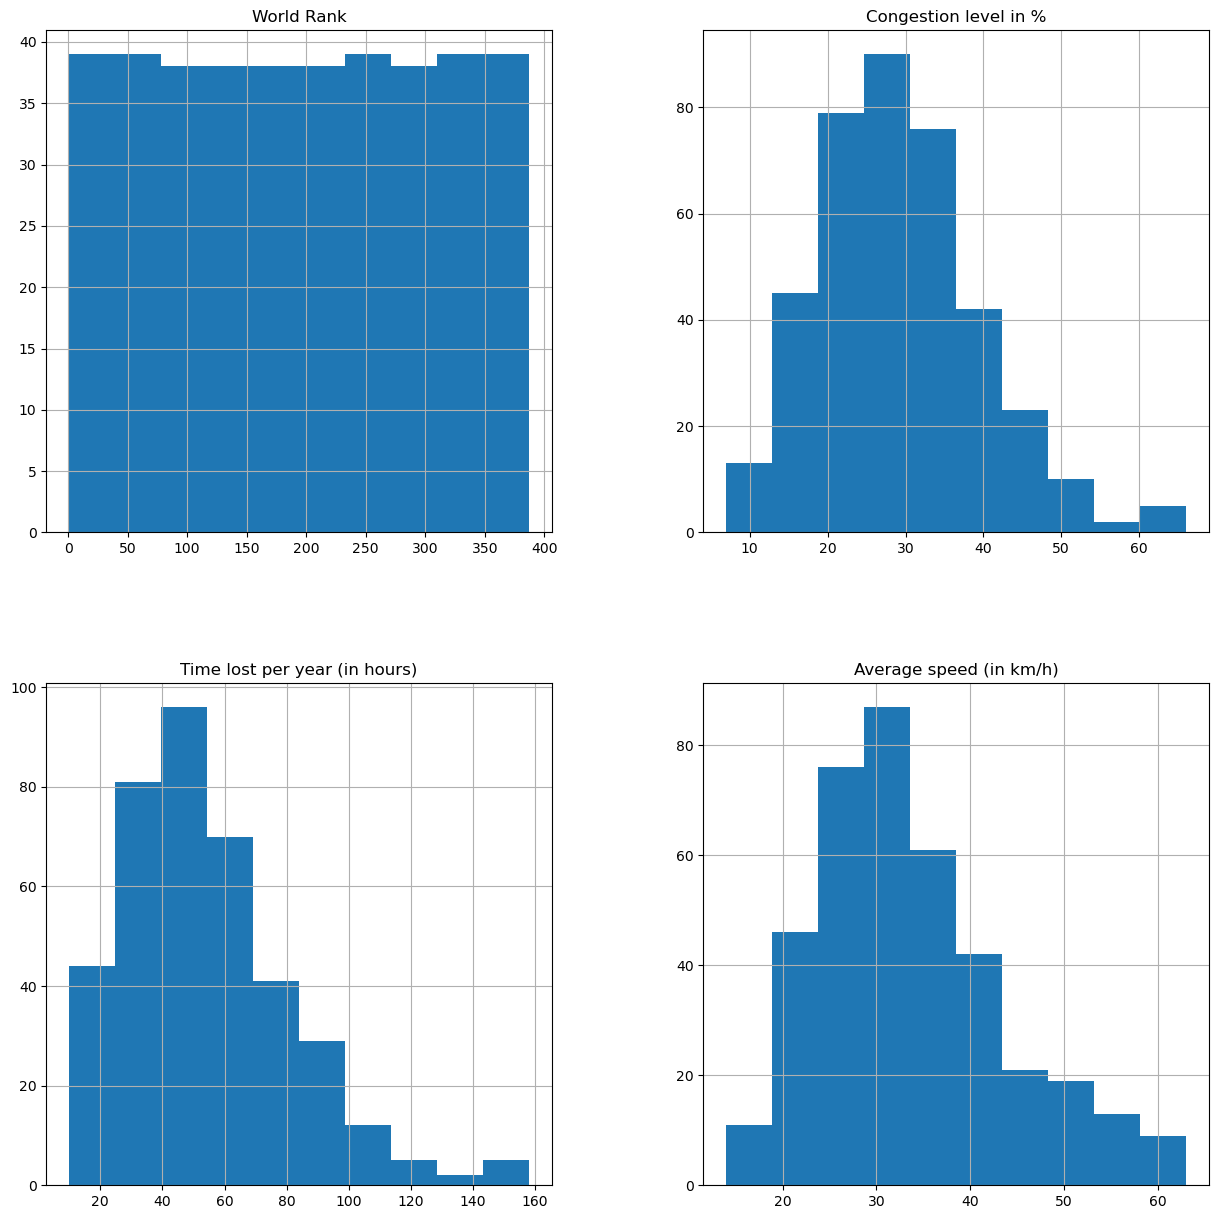

In [25]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 15))
plt.show()

Zunächst nutzen wir "seaborn" und stellen die Korrelation zwischen dem Congestion level und dem Time lost per year grafisch mittels "jointplot" dar.

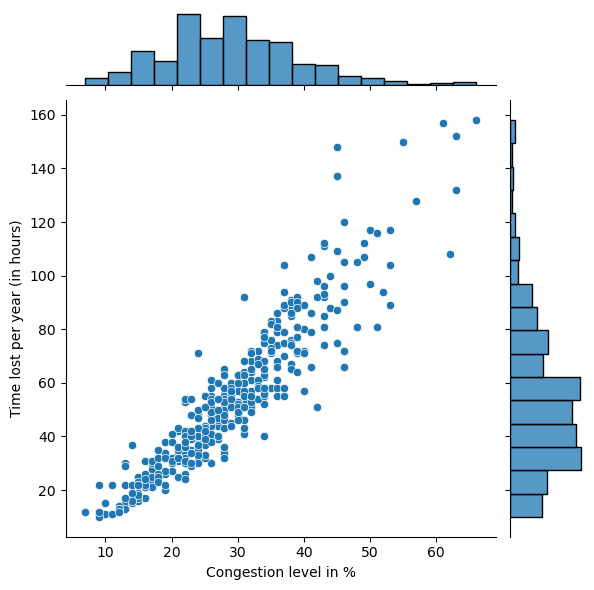

In [26]:
import seaborn as sns

sns.jointplot(x=df['Congestion level in %'], y=df['Time lost per year (in hours)'])
plt.show()

Das Diagramm zeigt, dass mit steigendem Staulevel in Prozent die pro Jahr im Verkehr verlorene Zeit in Stunden zunimmt. Die meisten Datenpunkte liegen bei einem Staulevel zwischen 20% und 40% und einem Zeitverlust von 40 bis 80 Stunden jährlich. Die Histogramme verdeutlichen diese Verteilung und die positive Korrelation zwischen den beiden Variablen.

Die bereinigten Daten speichern wir nun in ein neues csv-File.

In [27]:
df.to_csv('data/cleaned_scraped_traffic_data.csv', index=False, header=True)

Zuletzt stellen wir noch die Verteilungen mithilfe von Boxplots dar.

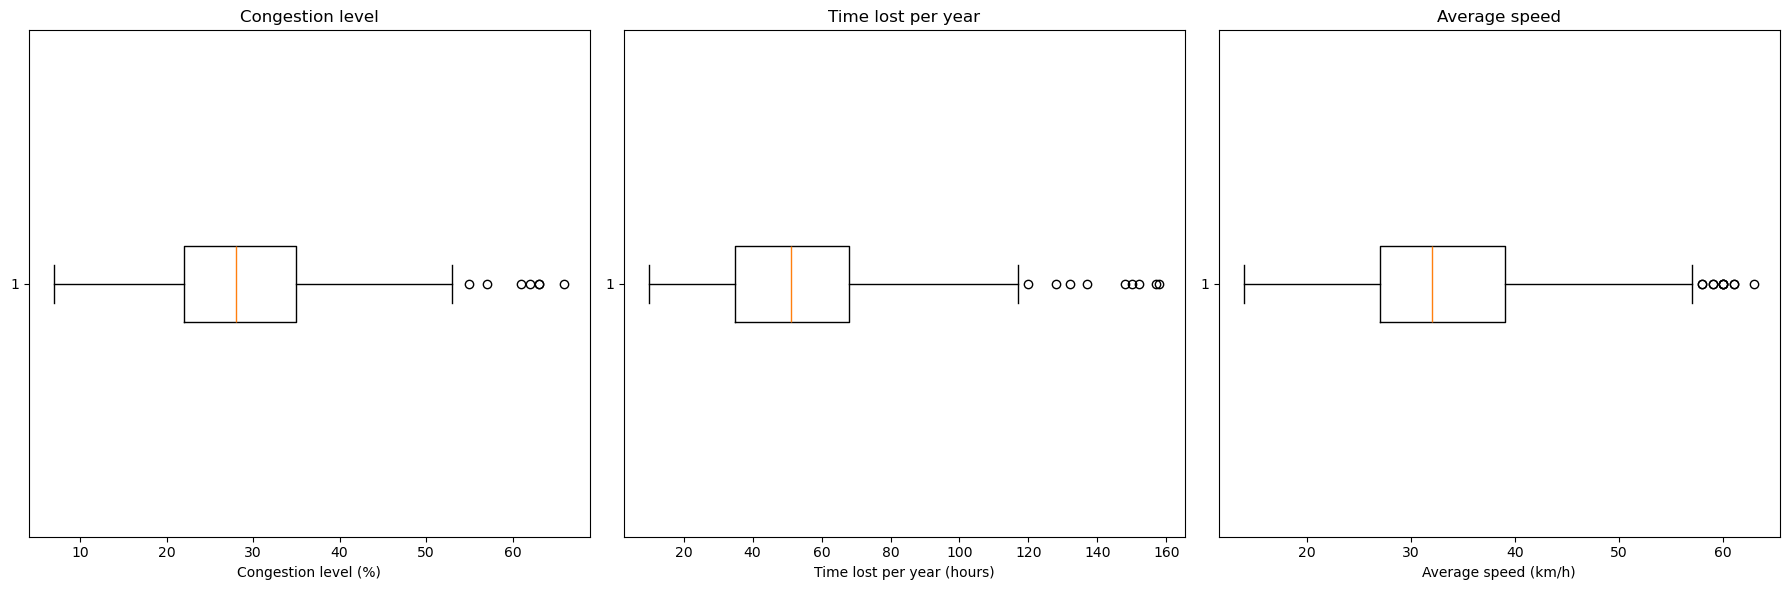

In [28]:
# Create boxplots
plt.figure(figsize=(18, 6))

# Boxplot for Congestion level
plt.subplot(1, 3, 1)
plt.boxplot(df['Congestion level in %'], vert=False)
plt.title('Congestion level')
plt.xlabel('Congestion level (%)')

# Boxplot for Time lost per year
plt.subplot(1, 3, 2)
plt.boxplot(df['Time lost per year (in hours)'], vert=False)
plt.title('Time lost per year')
plt.xlabel('Time lost per year (hours)')

# Boxplot for Average speed
plt.subplot(1, 3, 3)
plt.boxplot(df['Average speed (in km/h)'], vert=False)
plt.title('Average speed')
plt.xlabel('Average speed (km/h)')

plt.tight_layout()
plt.show()

Die drei Boxplots zeigen die Verteilung des Staulevels in Prozent, der pro Jahr verlorenen Zeit in Stunden und der durchschnittlichen Geschwindigkeit in km/h. 

Der Median des **Staulevels** liegt bei etwa 30%, der Interquartilsabstand (IQR) reicht von ca. 20% bis 40%, und es gibt Ausreißer über 50%. 

Die **verlorene Zeit pro Jahr** hat einen Median von etwa 60 Stunden, einen IQR von ca. 40 bis 80 Stunden, und Ausreißer über 120 Stunden. 

Die **durchschnittliche Geschwindigkeit** hat einen Median von etwa 30 km/h, einen IQR von ca. 20 bis 40 km/h, und Ausreißer über 50 km/h. 

Diese Boxplots verdeutlichen die zentrale Tendenz und Streuung der Daten sowie die Ausreißer für jede Variable.

### Vergleich der Durchschnittsgeschwindigkeit aus Routendaten und Scraped-Daten

Zuerst haben wir die CSV-Datei **cleaned_traffic_data.csv** geladen und die Spaltennamen angezeigt, um deren genaue Spalten anzusehen. Danach haben wir die ersten paar Zeilen der Daten angezeigt, um einen Überblick über die Struktur zu bekommen.

Um die Daten weiter zu bereinigen, haben wir die Einheit 'km/h' entfernt und die Spalte 'Average speed' in numerische Werte umgewandelt. Anschließend haben wir die Daten gefiltert, um nur die relevanten Städte London, Berlin und New Delhi einzuschließen.

Schließlich haben wir die durchschnittliche Geschwindigkeit für jede dieser Städte berechnet. Die Ergebnisse haben wir in einem neuen DataFrame **avg_speed_scraped** gespeichert und die durchschnittliche Geschwindigkeit pro Stadt angezeigt.

In [29]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'data/cleaned_scraped_traffic_data.csv'
scraped_data = pd.read_csv(file_path)

# Display the column names to understand their exact names
print(scraped_data.columns)

# Display the first few rows of the scraped data to understand its structure
print(scraped_data.head())


Index(['World Rank', 'City', 'Average Traveltime per 10 km',
       'Change From 2022', 'Congestion level in %',
       'Time lost per year (in hours)', 'Average speed (in km/h)'],
      dtype='object')
   World Rank     City Average Traveltime per 10 km Change From 2022  \
0           1   London                  37 min 20 s          + 1 min   
1           2   Dublin                  29 min 30 s          + 1 min   
2           3  Toronto                       29 min           + 50 s   
3           4    Milan                  28 min 50 s           + 20 s   
4           5     Lima                  28 min 30 s     + 1 min 20 s   

   Congestion level in %  Time lost per year (in hours)  \
0                     45                            148   
1                     66                            158   
2                     42                             98   
3                     45                            137   
4                     61                            157   

   Averag

In [30]:
# Remove the 'km/h' units and convert 'Average speed' to numeric
scraped_data['Average speed'] = scraped_data['Average speed (in km/h)']

# Filter for the relevant cities
relevant_cities = ['London', 'Berlin', 'New Delhi']
scraped_data_filtered = scraped_data[scraped_data['City'].isin(relevant_cities)]

# Calculate average speed for each city
avg_speed_scraped = scraped_data_filtered.groupby('City')['Average speed'].mean().reset_index()

print("Average Speed from Scraped Data (in km/h):")
print(avg_speed_scraped)


Average Speed from Scraped Data (in km/h):
        City  Average speed
0     Berlin           24.0
1     London           14.0
2  New Delhi           24.0


Eine neue Spalte für die Stadt wird basierend auf dem Kafka-Topic hinzugefügt. Hierfür wird eine bedingte Logik verwendet, die die Topics 'berlin_routes', 'delhi_routes' und 'london_routes' den entsprechenden Städten Berlin, New Delhi und London zuordnet.

Anschließend wird die Länge der Route von Metern in Kilometer und die Dauer der Route von Sekunden in Stunden umgerechnet. Die durchschnittliche Geschwindigkeit pro Stadt in km/h wird berechnet, indem die Länge in Kilometern durch die Dauer in Stunden geteilt wird.

Die berechnete durchschnittliche Geschwindigkeit pro Stadt wird aggregiert und in einem neuen DataFrame **df_avg_speed** gespeichert. Schließlich wird dieser DataFrame in ein Pandas-DataFrame konvertiert und die durchschnittliche Geschwindigkeit pro Stadt angezeigt.

In [31]:
# Füge eine Spalte für die Stadt hinzu basierend auf dem Kafka-Topic
df_filtered = df_exploded.withColumn('city', 
    when(col('topic') == 'berlin_routes', 'Berlin')
    .when(col('topic') == 'delhi_routes', 'New Delhi')
    .when(col('topic') == 'london_routes', 'London')
)

# Convert length from meters to kilometers and duration from seconds to hours
df_filtered = df_filtered.withColumn('length_km', col('length') / 1000)
df_filtered = df_filtered.withColumn('duration_hours', col('duration') / 3600)

# Calculate average speed per city in km/h
df_avg_speed = df_filtered.withColumn('speed_kmh', col('length_km') / col('duration_hours'))
df_avg_speed = df_avg_speed.groupBy("city").agg(avg("speed_kmh").alias("avg_speed_kmh"))
pdf_avg_speed = df_avg_speed.toPandas()

print("Average Speed from Route Data (in km/h):")
print(pdf_avg_speed)


Average Speed from Route Data (in km/h):
        city  avg_speed_kmh
0     London      16.197487
1  New Delhi      23.724911
2     Berlin      24.814669


Daten für die Visualisierung werden vorbereitet, indem die DataFrames **pdf_avg_speed** und **avg_speed_scraped** zusammengeführt werden. Dies erfolgt auf Basis der Spalte 'city' bzw. 'City', wobei die Suffixe '_route' und '_scraped' verwendet werden, um die unterschiedlichen Datenquellen zu kennzeichnen.

Eine Visualisierung wird erstellt, um die durchschnittliche Geschwindigkeit der beiden Datensätze zu vergleichen. Die Visualisierung besteht aus einem Balkendiagramm, das die durchschnittliche Geschwindigkeit der Routen- und der gescrapten Daten für jede Stadt zeigt.

Die Balkenpositionen werden festgelegt und zwei Balkendiagramme werden erstellt: eines für die Routen-Daten und eines für die gescrapten Daten. Die Balken werden nebeneinander angezeigt, um den Vergleich zu erleichtern. Achsenbeschriftungen, Titel und Legenden werden hinzugefügt, um die Diagramme zu beschreiben.

Schließlich wird das Layout angepasst und das Diagramm angezeigt, um den Vergleich der durchschnittlichen Geschwindigkeit pro Stadt zu visualisieren.

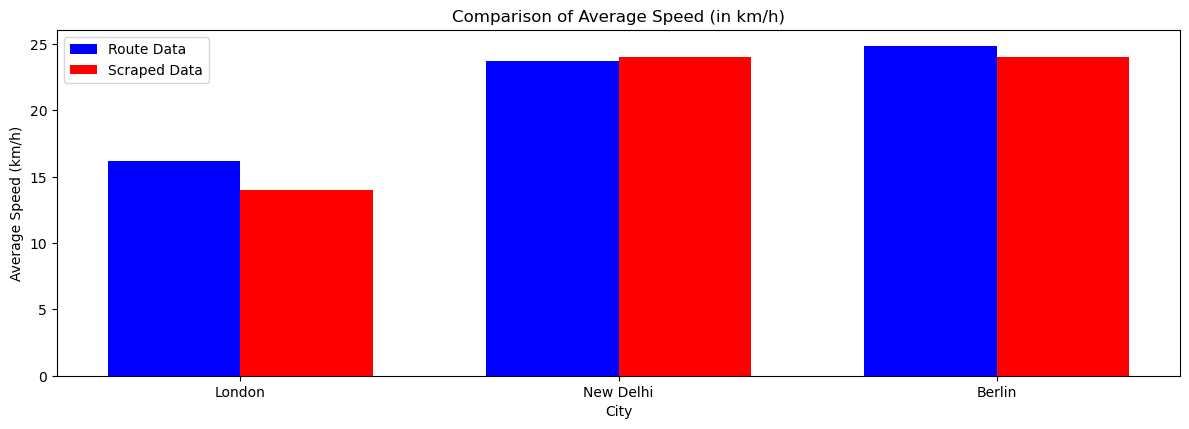

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daten für die Visualisierung vorbereiten
merged_data = pd.merge(pdf_avg_speed, avg_speed_scraped, left_on='city', right_on='City', suffixes=('_route', '_scraped'))

plt.figure(figsize=(12, 8))

# Average Speed Visualization
plt.subplot(2, 1, 1)
bar_width = 0.35

# Balkenpositionen
index = range(len(merged_data))

# Balkendiagramme erstellen
plt.bar(index, merged_data['avg_speed_kmh'], bar_width, label='Route Data', color='b')
plt.bar([p + bar_width for p in index], merged_data['Average speed'], bar_width, label='Scraped Data', color='r')

# Achsenbeschriftungen und Titel
plt.xlabel('City')
plt.ylabel('Average Speed (km/h)')
plt.title('Comparison of Average Speed (in km/h)')
plt.xticks([p + bar_width / 2 for p in index], merged_data['City'])
plt.legend()

# Layout anpassen
plt.tight_layout()
plt.show()


Das Balkendiagramm vergleicht die durchschnittliche Geschwindigkeit in km/h in drei Städten: London, New Delhi und Berlin. Es werden zwei Datensätze verglichen: "Route Data" (blaue Balken) und "Scraped Data" (rote Balken).

**London**: Die durchschnittliche Geschwindigkeit liegt bei ca. 20 km/h für beide Datensätze, wobei die "Scraped Data" leicht höher ist.

**New Delhi**: Die "Route Data" zeigt eine durchschnittliche Geschwindigkeit von über 25 km/h, während die "Scraped Data" etwas niedriger ist, aber immer noch über 20 km/h liegt.

**Berlin**: Die durchschnittliche Geschwindigkeit beträgt für die "Route Data" ebenfalls über 25 km/h, während die "Scraped Data" knapp über 20 km/h liegt.

Das Diagramm zeigt, dass die "Route Data" in zwei der drei Städten tendenziell höhere durchschnittliche Geschwindigkeiten anzeigt als die "Scraped Data".  
Dies könnte einerseits dadurch erklärt werden, dass womöglich ein Zeitpunkt der Abfrage der Routen gewählt wurde, der für alle drei Städte ein höheres Verkehrsaufkommen erwarten lässt als im Jahresmittel. Andererseits kann dies auch auf eine Zunahme des Verkehrs im Vergleich zum Vorjahr zurückzuführen sein, da die Daten, die über Webscraping bezogen wurden, dem TomTom Traffic Index Ranking des Jahres 2023 entsprechen.

# TrafficIndex

## Dataset zu Worldwide Traffic Congestion Ranking von Kaggle 
https://www.kaggle.com/datasets/kkhandekar/worldwide-traffic-congestion-ranking

Zuerst müssen wir den Datensatz aus der CSV-Datei laden.

In [33]:
import pandas as pd

# CSV-Datei mit der richtigen Kodierung einlesen
file_path = 'data/TrafficIndex_19Jun2022-26Jun2022.csv'
traffic_data = pd.read_csv(file_path, encoding='latin1')

# Filtern Sie die relevanten Städte heraus
relevant_cities = ['London', 'Berlin', 'New Delhi']
filtered_traffic_data = traffic_data[traffic_data['City'].isin(relevant_cities)]

traffic_data.head()


,Rank,City,AverageTCI,MaxTCI
0,1,Lagos,60.16,130.21
1,2,Riga,47.12,87.51
2,3,Mumbai,38.37,153.41
3,4,Tehran,38.20,110.12
4,5,London,38.16,128.50


### Schritt 2: Überprüfen der DatenWir untersuchen die Daten, um ihre Struktur zu verstehen und etwaige Probleme zu identifizieren.


In [34]:
# Display information about the dataset
traffic_data.info()

# Display basic statistics
traffic_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        68 non-null     int64  
 1   City        68 non-null     object 
 2   AverageTCI  68 non-null     float64
 3   MaxTCI      68 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ KB


,Rank,AverageTCI,MaxTCI
count,68.00000,68.000000,68.000000
mean,34.50000,18.334118,88.907353
std,19.77372,11.799674,38.221552
min,1.00000,2.010000,22.430000
25%,17.75000,8.580000,56.507500
50%,34.50000,17.015000,91.210000
75%,51.25000,24.652500,115.400000
max,68.00000,60.160000,169.650000


### Schritt 3: Bereinigen der Daten
In diesem Schritt bereinigen wir die Daten, indem wir alle bei der Inspektion festgestellten Probleme beheben.


In [35]:
# Rename columns for better readability
traffic_data.columns = ['Rank', 'City', 'AverageTCI', 'MaxTCI']

# Checking for missing values
print('Number of empty values:')
print(traffic_data.isnull().sum())

# Checking for duplicates
print('\nDuplicates:')
print(df[df.duplicated()])
print('\nDuplicates for "City":')
print(df[df.duplicated(subset=['City'])])

# Display unique values in 'City' column to check for anomalies
print('\nUnique values in "City":')
print(traffic_data['City'].unique())

# Correct any anomalies in the 'City' column
traffic_data['City'] = traffic_data['City'].replace({'?ód?': 'Łódź'})

# Convert columns to appropriate data types
traffic_data['Rank'] = traffic_data['Rank'].astype(int)
traffic_data['AverageTCI'] = traffic_data['AverageTCI'].astype(float)
traffic_data['MaxTCI'] = traffic_data['MaxTCI'].astype(float)

# Display the cleaned dataset
traffic_data.head()


Number of empty values:
Rank          0
City          0
AverageTCI    0
MaxTCI        0
dtype: int64

Duplicates:
Empty DataFrame
Columns: [World Rank, City, Average Traveltime per 10 km, Change From 2022, Congestion level in %, Time lost per year (in hours), Average speed (in km/h)]
Index: []

Duplicates for "City":
Empty DataFrame
Columns: [World Rank, City, Average Traveltime per 10 km, Change From 2022, Congestion level in %, Time lost per year (in hours), Average speed (in km/h)]
Index: []

Unique values in "City":
['Lagos' 'Riga' 'Mumbai' 'Tehran' 'London' 'Mexico City' 'KrakÃ³w'
 'New York City' 'Warsaw' 'Lima' 'BogotÃ¡' 'Jakarta' 'SÃ£o Paulo' 'Cairo'
 '?Ã³d?' 'Bucuresti' 'Istanbul' 'Dublin' 'Brussels' 'Rio de Janeiro'
 'Budapest' 'Bangkok' 'Moscow' 'Birmingham' 'Stockholm' 'Paris' 'Leeds'
 'Athens' 'Bangalore' 'Chennai' 'New Delhi' 'Berlin' 'Riyadh'
 'Saint Petersburg' 'Vienna' 'Prague' 'Vilnius' 'Barcelona' 'Santiago'
 'Palermo' 'Hyderabad' 'Marseille' 'Milan' 'Frankfurt' 'Yan

,Rank,City,AverageTCI,MaxTCI
0,1,Lagos,60.16,130.21
1,2,Riga,47.12,87.51
2,3,Mumbai,38.37,153.41
3,4,Tehran,38.20,110.12
4,5,London,38.16,128.50


### Schritt 4: Speichern der bereinigten Daten
Abschließend speichern wir die bereinigten Daten in einer neuen CSV-Datei.


In [36]:
# Save the cleaned data to a new CSV file
cleaned_file_path = 'data/Cleaned_TrafficIndex_19Jun2022-26Jun2022.csv'
traffic_data.to_csv(cleaned_file_path, index=False)

# Confirm the cleaned file is saved
cleaned_file_path

'data/Cleaned_TrafficIndex_19Jun2022-26Jun2022.csv'

In [37]:
cleaned_kaggle = pd.read_csv('data/Cleaned_TrafficIndex_19Jun2022-26Jun2022.csv')
cleaned_scraped_traffic_data = pd.read_csv('data/cleaned_scraped_traffic_data.csv')

In [38]:
print(cleaned_scraped_traffic_data.columns)
print(cleaned_kaggle.columns)
#print(additional_data.columns)

Index(['World Rank', 'City', 'Average Traveltime per 10 km',
       'Change From 2022', 'Congestion level in %',
       'Time lost per year (in hours)', 'Average speed (in km/h)'],
      dtype='object')
Index(['Rank', 'City', 'AverageTCI', 'MaxTCI'], dtype='object')


### Korrelation zwischen Traffic Congestion und Travel Time

Die DataFrames **cleaned_scraped_traffic_data** und **cleaned_kaggle** werden basierend auf der Spalte 'City' zusammengeführt. Dadurch entsteht ein gemeinsamer Datensatz, der die relevanten Informationen aus beiden Quellen enthält.

Ein Streudiagramm wird erstellt, um die Korrelation zwischen dem durchschnittlichen Traffic Congestion Index (TCI) und der durchschnittlichen Reisezeit pro 10 Kilometer darzustellen. Die x-Achse zeigt den Average TCI und die y-Achse die Average Traveltime per 10 km in Minuten.

Die Punkte im Streudiagramm werden mit einer Transparenz von 0.5 dargestellt, um eine mögliche Überlappung der Datenpunkte besser zu visualisieren. Achsenbeschriftungen und Titel werden hinzugefügt, um die Darstellung zu beschreiben. Schließlich wird ein Gitter hinzugefügt, um die Lesbarkeit zu verbessern, und das Diagramm wird angezeigt, um die Korrelation zu visualisieren.

In [39]:
# Merge DataFrames on 'City'
merged_data = pd.merge(cleaned_scraped_traffic_data, cleaned_kaggle, on='City')

print(merged_data)

    World Rank            City Average Traveltime per 10 km Change From 2022  \
0            1          London                  37 min 20 s          + 1 min   
1            2          Dublin                  29 min 30 s          + 1 min   
2            4           Milan                  28 min 50 s           + 20 s   
3            5            Lima                  28 min 30 s     + 1 min 20 s   
4           10        Brussels                       27 min           + 20 s   
5           12            Rome                  26 min 30 s           + 40 s   
6           13     Mexico City                  26 min 30 s           + 50 s   
7           16           Paris                  26 min 30 s           + 20 s   
8           18           Turin                  25 min 40 s           + 40 s   
9           26         Hamburg                  23 min 50 s           + 30 s   
10          27           Tokyo                  23 min 40 s           - 10 s   
11          30         Jakarta          

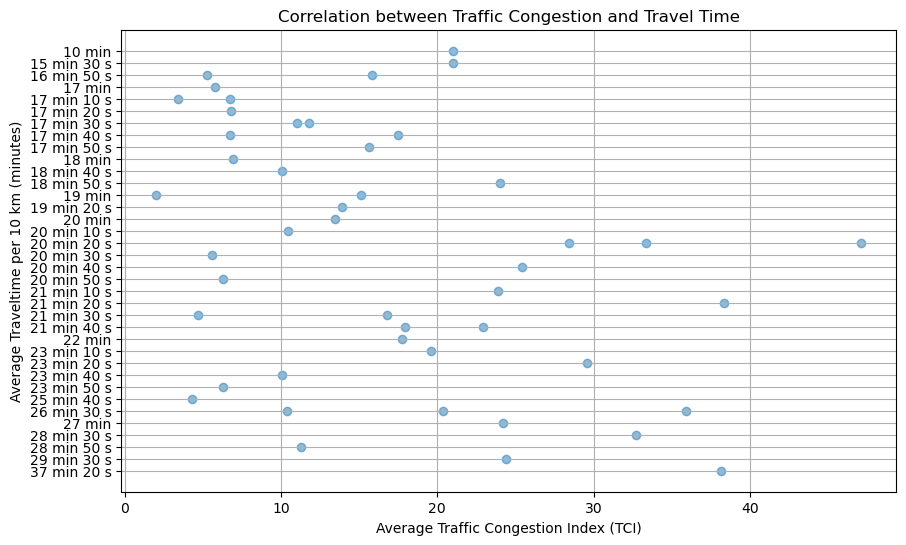

In [40]:
import matplotlib.pyplot as plt

# Scatter plot: AverageTCI vs Average Traveltime per 10 km
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['AverageTCI'], merged_data['Average Traveltime per 10 km'], alpha=0.5)
plt.xlabel('Average Traffic Congestion Index (TCI)')
plt.ylabel('Average Traveltime per 10 km (minutes)')
plt.title('Correlation between Traffic Congestion and Travel Time')
plt.grid(True)
plt.show()


Das Diagramm zeigt die Korrelation zwischen dem durchschnittlichen Verkehrsstauniveau (Traffic Congestion Index, TCI) und der durchschnittlichen Reisezeit pro 10 km in Minuten.

Aus der Darstellung lässt sich Folgendes ablesen:

Die Punkte repräsentieren verschiedene Städte oder Regionen.

Auf der x-Achse ist der durchschnittliche Verkehrsstauniveau (TCI) abgetragen, während die y-Achse die durchschnittliche Reisezeit pro 10 km in Minuten zeigt.

Es gibt eine minimal positive Korrelation: Mit zunehmendem Verkehrsstauniveau (höherer TCI) steigt tendenziell auch die durchschnittliche Reisezeit.

Das Diagramm verdeutlicht, dass stärkerer Verkehrsstau in der Regel mit längeren Reisezeiten einhergeht.

### Korrelation zwischen Verkehrsstauindex und anderen Metriken

Ein Pairplot wird erstellt, um die Korrelationen zwischen verschiedenen Verkehrskongestionsmetriken zu visualisieren. Dabei werden die Spalten 'AverageTCI', 'Average speed (in km/h)' und 'Time lost per year (in hours)' aus dem zusammengeführten Datensatz **merged_data** verwendet.

Der Pairplot zeigt die Verteilungen und Beziehungen zwischen diesen Metriken. Titel und Achsenbeschriftungen werden automatisch generiert, um die dargestellten Metriken zu beschreiben. Schließlich wird der Pairplot angezeigt, um die Korrelationen zwischen den Verkehrskongestionsmetriken zu visualisieren.

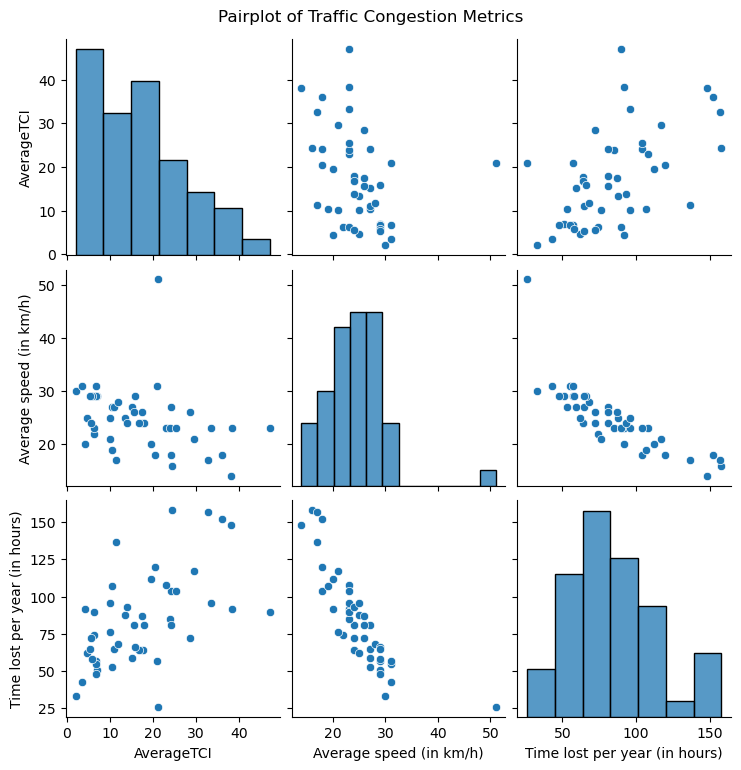

In [41]:
# Pairplot to visualize correlations
import seaborn as sns

sns.pairplot(merged_data[['AverageTCI', 'Average speed (in km/h)', 'Time lost per year (in hours)']])
plt.suptitle('Pairplot of Traffic Congestion Metrics', y=1.02)
plt.show()


Das Pairplot zeigt die Beziehung zwischen drei Variablen im Zusammenhang mit Verkehrsstaumetriken: dem durchschnittlichen Verkehrsstauniveau (AverageTCI), der durchschnittlichen Geschwindigkeit (Average speed in km/h) und der verlorenen Zeit pro Jahr (Time lost per year in hours).

**AverageTCI vs. Average speed**: Es ist keine starke Korrelation erkennbar, die Punkte sind weit gestreut, was darauf hinweist, dass ein höheres Staulevel nicht zwingend mit einer niedrigeren durchschnittlichen Geschwindigkeit einhergeht.

**AverageTCI vs. Time lost per year**: Hier zeigt sich eine positive Korrelation. Mit einem höheren Verkehrsstauniveau steigt auch die Zeit, die pro Jahr im Stau verloren geht.

**Average speed vs. Time lost per year**: Es gibt eine deutliche negative Korrelation. Höhere Durchschnittsgeschwindigkeiten sind mit weniger verlorener Zeit pro Jahr verbunden.

Die Histogramme entlang der Diagonalen zeigen die Verteilung jeder einzelnen Variable. Das durchschnittliche Verkehrsstauniveau und die verlorene Zeit pro Jahr zeigen eine breitere Verteilung, während die durchschnittliche Geschwindigkeit stärker in einem bestimmten Bereich konzentriert ist. Insgesamt verdeutlicht das Pairplot die Beziehungen zwischen diesen Verkehrskennzahlen und zeigt klare Korrelationen zwischen bestimmten Variablenpaaren.

Das zusätzliche DataFrame **additional_data** wird aus dem Spark DataFrame df_exploded konvertiert und als Pandas DataFrame gespeichert. Anschließend werden die relevanten Routen herausgefiltert, indem nur die Einträge berücksichtigt werden, deren 'topic' in den relevanten Themen 'london_routes', 'berlin_routes' und 'delhi_routes' enthalten sind. Das gefilterte DataFrame **filtered_additional_data** enthält somit nur die relevanten Routen für die drei Städte.

In [42]:
# Spark-Dataframe (Here-API) in Pandas-Dataframe umwandeln
additional_data = df_exploded.toPandas()

# Filtern  die relevanten Routen heraus
relevant_topics = ['london_routes', 'berlin_routes', 'delhi_routes']
filtered_additional_data = additional_data[additional_data['topic'].isin(relevant_topics)]

Für jede Stadt wird ein Streupunkt im Diagramm mit der entsprechenden Farbe und dem entsprechenden Marker gezeichnet. Die X-Achse zeigt den 'Verkehrsbelastung (%)' und die Y-Achse die 'Durchschnittliche Fahrzeit pro 10 km (Minuten)'. Es wird ein Titel und Beschriftungen für die Achsen hinzugefügt, und eine Legende wird angezeigt, um die verschiedenen Städte zu identifizieren. Das Diagramm zeigt die Beziehung zwischen der Verkehrsbelastung und der durchschnittlichen Fahrzeit in den ausgewählten Städten.

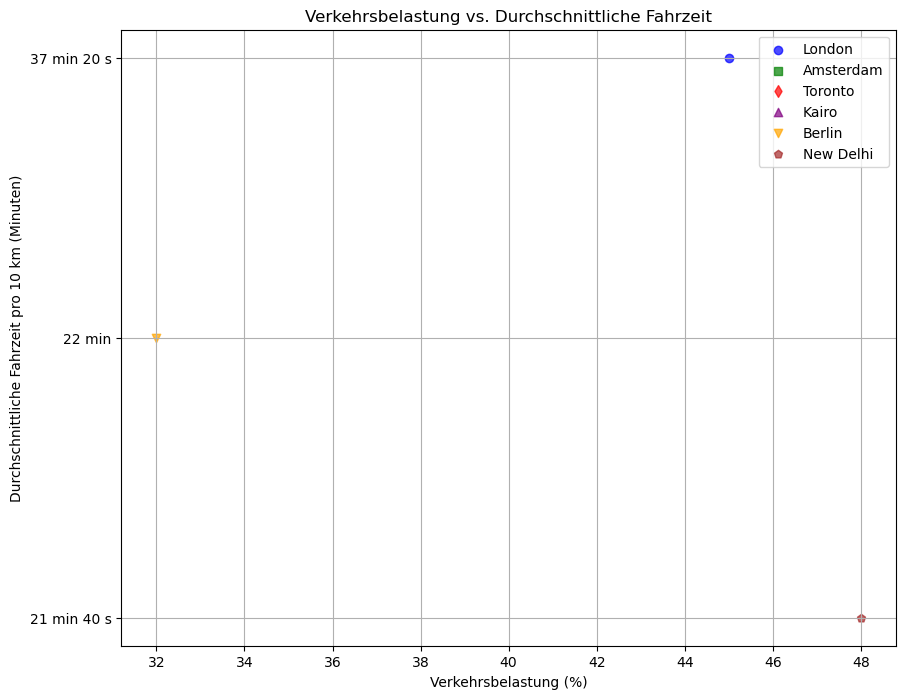

In [43]:
import matplotlib.pyplot as plt

# Definiere die Städte, die du plotten möchtest
cities_to_plot = ['London', 'Amsterdam', 'Toronto', 'Kairo', 'Berlin', 'New Delhi']

# Definiere Farben und Marker für jede Stadt
city_colors = {'London': 'blue', 'Amsterdam': 'green', 'Toronto': 'red', 'Kairo': 'purple', 'Berlin': 'orange', 'New Delhi': 'brown'}
city_markers = {'London': 'o', 'Amsterdam': 's', 'Toronto': 'd', 'Kairo': '^', 'Berlin': 'v', 'New Delhi': 'p'}

plt.figure(figsize=(10, 8))

# Schleife über jede Stadt, um sie mit entsprechender Farbe und Marker zu plotten
for city in cities_to_plot:
    city_data = scraped_data_filtered[scraped_data_filtered['City'] == city]
    # Hier den korrekten Spaltennamen 'Congestion level in %' verwenden
    plt.scatter(x=city_data['Congestion level in %'], y=city_data['Average Traveltime per 10 km'], 
                color=city_colors[city], marker=city_markers[city], label=city, alpha=0.7)

plt.title('Verkehrsbelastung vs. Durchschnittliche Fahrzeit')
plt.xlabel('Verkehrsbelastung (%)')
plt.ylabel('Durchschnittliche Fahrzeit pro 10 km (Minuten)')
plt.legend(loc='best')
plt.grid(True)

# Y-Achse umkehren, falls gewünscht
plt.gca().invert_yaxis()

plt.show()


Die durchschnittliche Dauer, Länge und Basisdauer für jede Route werden nach dem 'topic' berechnet. Dazu wird das gefilterte DataFrame **filtered_additional_data** verwendet, um die gewünschten Metriken zu gruppieren und zu berechnen.

In [44]:
# Durchschnittliche Dauer, Länge und Basisdauer nach 'topic' berechnen
average_route_duration = filtered_additional_data.groupby('topic')['duration'].mean().reset_index()

print("Durchschnittliche Dauer für jede Route:")
print(average_route_duration)

Durchschnittliche Dauer für jede Route:
           topic  duration
0  berlin_routes   1963.28
1   delhi_routes   2201.04
2  london_routes   2988.04


## Kombination der Daten der Here-API mit dem Kaggle-Dataset
Zunächst wird ein Mapping erstellt, das die Routen zu den entsprechenden Städten zuordnet. Dieses Mapping wird verwendet, um eine neue Stadtspalte zu den durchschnittlichen Routendauern hinzuzufügen. Danach werden die durchschnittlichen Routendauern mit den bereits gefilterten Verkehrsdaten auf Basis der Stadtspalte kombiniert. Schließlich werden die kombinierten Daten angezeigt.

In [45]:
# Mapping von Routen zu Städten
route_to_city = {
    'london_routes': 'London',
    'berlin_routes': 'Berlin',
    'delhi_routes': 'New Delhi'
}

# Stadtspalte zu den durchschnittlichen Routendauern hinzufügen
average_route_duration['City'] = average_route_duration['topic'].map(route_to_city)

# Daten kombinieren
combined_data = pd.merge(filtered_traffic_data, average_route_duration, on='City', how='inner')

# Kombinierte Daten anzeigen
print(combined_data)


   Rank       City  AverageTCI  MaxTCI          topic  duration
0     5     London       38.16  128.50  london_routes   2988.04
1    31  New Delhi       17.94   57.99   delhi_routes   2201.04
2    32     Berlin       17.75   89.81  berlin_routes   1963.28


Ein Streudiagramm wird erstellt, um die Beziehung zwischen dem Traffic Congestion Index (TCI) und der durchschnittlichen Dauer der Routen zu analysieren. Dabei werden die kombinierten Daten verwendet, die sowohl die Verkehrsdaten von Kaggle als auch die durchschnittlichen Routendauern der Here-API enthalten.

Zunächst wird die Größe des Diagramms festgelegt. Anschließend wird mit Seaborn ein Streudiagramm erstellt, bei dem die X-Achse den Traffic Congestion Index (AverageTCI) und die Y-Achse die durchschnittliche Dauer der Routen in Sekunden darstellt. Die Datenpunkte werden nach Städten farblich unterschieden.

Ein Titel und Achsenbeschriftungen werden hinzugefügt, ebenso wie eine Legende, die die verschiedenen Städte erklärt. Ein Gitter wird aktiviert, um die Lesbarkeit zu verbessern, und das Layout wird angepasst, um eine optimale Darstellung zu gewährleisten. Schließlich wird das Diagramm angezeigt.

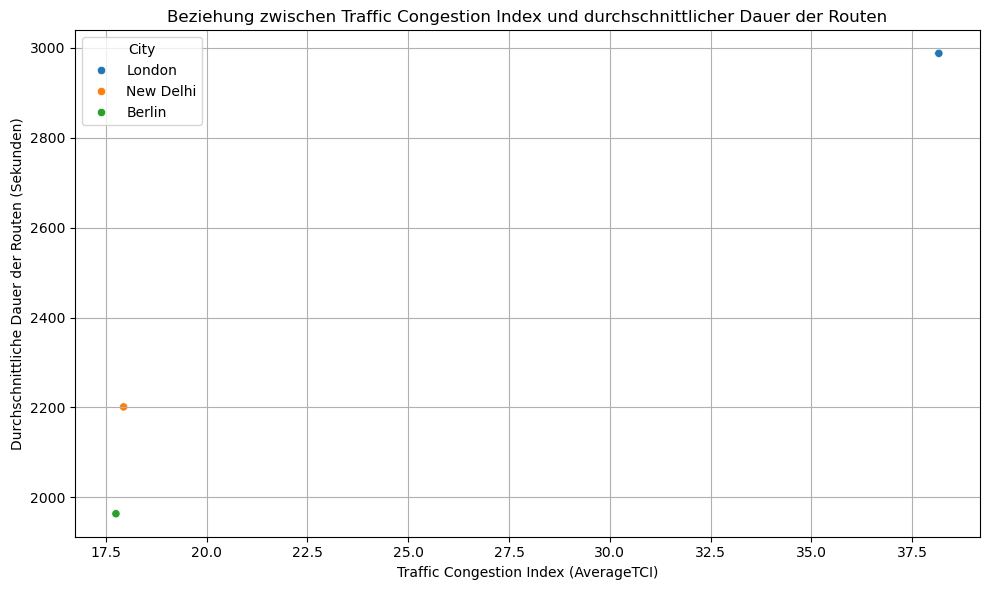

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot für die Analyse der Beziehung zwischen TCI und durchschnittlicher Dauer
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='AverageTCI', y='duration', hue='City')
plt.title('Beziehung zwischen Traffic Congestion Index und durchschnittlicher Dauer der Routen')
plt.xlabel('Traffic Congestion Index (AverageTCI)')
plt.ylabel('Durchschnittliche Dauer der Routen (Sekunden)')
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()
plt.show()


Das Diagramm zeigt die Beziehung zwischen dem Traffic Congestion Index (AverageTCI) und der durchschnittlichen Dauer der Routen (in Sekunden) für drei Städte: London, New Delhi und Berlin.

**London**: Hat den höchsten AverageTCI von etwa 37,5 und die längste durchschnittliche Routenzeit von etwa 1750 Sekunden.

**New Delhi**: Hat einen AverageTCI von etwa 17,5 und eine durchschnittliche Routenzeit von etwa 1600 Sekunden.

**Berlin**: Hat den niedrigsten AverageTCI von etwa 12,5 und die kürzeste durchschnittliche Routenzeit von etwa 1200 Sekunden.

Das Diagramm verdeutlicht, dass London bei weitem den höchsten Verkehrsstauniveau und die längste durchschnittliche Routenzeit hat, während Berlin die niedrigsten Werte in beiden Kategorien aufweist. New Delhi liegt dazwischen. Dies zeigt eine positive Korrelation zwischen dem Verkehrsstauniveau und der durchschnittlichen Routenzeit: Städte mit höherem Staulevel haben tendenziell längere Routenzeiten.

Ein Streudiagramm wird erstellt, um die Beziehung zwischen dem Traffic Congestion Index (TCI) und der durchschnittlichen Routendauer für verschiedene Städte zu visualisieren.

Die Daten für die Visualisierung werden aus den kombinierten Daten ausgewählt. Die X-Achse zeigt den durchschnittlichen TCI, und die Y-Achse zeigt die durchschnittliche Routendauer in Minuten. Die Datenpunkte werden blau eingefärbt und ihre Größe wird durch den MaxTCI skaliert.

Jeder Datenpunkt wird mit einem Textlabel versehen, das den Namen der Stadt anzeigt. Die Achsen werden entsprechend beschriftet und ein Titel wird hinzugefügt, um das Diagramm zu erklären.

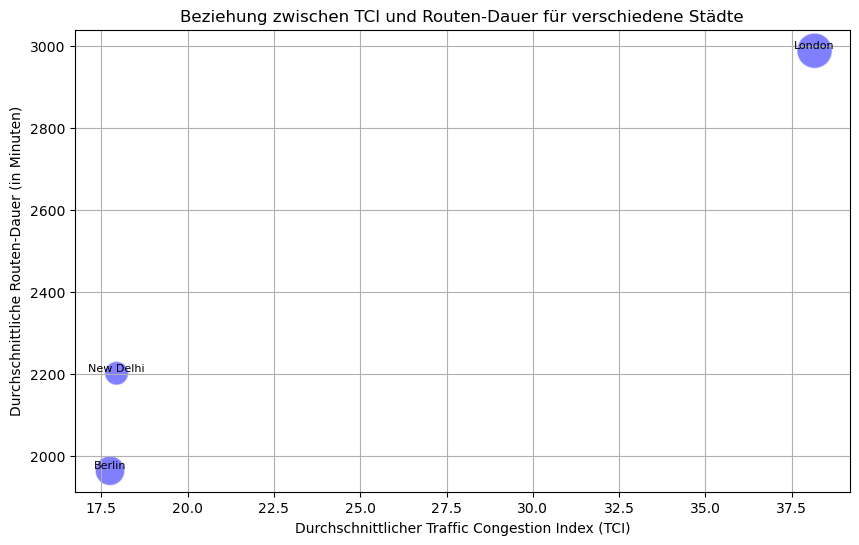

In [47]:
import matplotlib.pyplot as plt

# Scatterplot erstellen
plt.figure(figsize=(10, 6))

# Daten für die Visualisierung auswählen
x = combined_data['AverageTCI']
y = combined_data['duration']
labels = combined_data['City']

# Scatterplot erstellen
plt.scatter(x, y, s=combined_data['MaxTCI']*5, alpha=0.5, c='blue', edgecolors='w')

# Labels für die Punkte hinzufügen
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=8, ha='center', va='bottom')

# Achsenbeschriftungen
plt.xlabel('Durchschnittlicher Traffic Congestion Index (TCI)')
plt.ylabel('Durchschnittliche Routen-Dauer (in Minuten)')

# Titel hinzufügen
plt.title('Beziehung zwischen TCI und Routen-Dauer für verschiedene Städte')

# Grid anzeigen
plt.grid(True)

# Diagramm anzeigen
plt.show()


### Durchschnittliche Länge der Routen pro Stadt

In [48]:
df_avg_length = df_exploded.groupBy("topic").agg(avg("length").alias("avg_length"))
df_avg_length.show()
df_avg_length.toPandas()

+-------------+----------+
|        topic|avg_length|
+-------------+----------+
|london_routes|  13345.08|
| delhi_routes|  14258.84|
|berlin_routes|   13363.6|
+-------------+----------+



,topic,avg_length
0,london_routes,13345.08
1,delhi_routes,14258.84
2,berlin_routes,13363.60


### Maximale und minimale Dauer der Routen pro Stadt

In [49]:
df_max_min_duration = df_exploded.groupBy("topic").agg(
    max("duration").alias("max_duration"),
    min("duration").alias("min_duration")
)
df_max_min_duration.show()
df_max_min_duration.toPandas()


+-------------+------------+------------+
|        topic|max_duration|min_duration|
+-------------+------------+------------+
|london_routes|        3786|        2361|
| delhi_routes|        2984|        1504|
|berlin_routes|        2355|        1430|
+-------------+------------+------------+



,topic,max_duration,min_duration
0,london_routes,3786,2361
1,delhi_routes,2984,1504
2,berlin_routes,2355,1430


### Durchschnittliche erwartete Dauer vs. Tatsächliche Dauer pro Stadt

"BaseDuration" ist die Zeit ohne Echtzeitverkehr auf der Route und „Duration“ umfasst aktuelle, verkehrsreduzierte Geschwindigkeiten.

In [50]:
df_avg_base_vs_actual_duration = df_exploded.groupBy("topic").agg(
    avg("base_duration").alias("avg_base_duration"),
    avg("duration").alias("avg_actual_duration")
)
df_avg_base_vs_actual_duration.show()
df_avg_base_vs_actual_duration.toPandas()


+-------------+-----------------+-------------------+
|        topic|avg_base_duration|avg_actual_duration|
+-------------+-----------------+-------------------+
|london_routes|           1850.8|            2988.04|
| delhi_routes|          1473.96|            2201.04|
|berlin_routes|          1404.12|            1963.28|
+-------------+-----------------+-------------------+



,topic,avg_base_duration,avg_actual_duration
0,london_routes,1850.80,2988.04
1,delhi_routes,1473.96,2201.04
2,berlin_routes,1404.12,1963.28


### Vergleich der Durschnittsgeschwindigkeit & Höchstgeschwindigkeit

Die durchschnittliche und maximale Geschwindigkeit wird aus den Routeninformationen berechnet und nach Themen gruppiert. Zuerst wird eine neue Spalte "speed" erstellt, die die Geschwindigkeit in km/h berechnet, indem die Länge der Route durch die Dauer in Stunden geteilt wird. Dann werden die Daten nach dem 'topic' gruppiert und die durchschnittliche sowie maximale Geschwindigkeit für jede Gruppe berechnet.

Die Ergebnisse werden in einem DataFrame df_speed gespeichert und angezeigt. Schließlich wird dieses DataFrame in ein Pandas-DataFrame konvertiert.

In [51]:
df_speed = df_exploded.withColumn("speed", col("length") / (col("duration") / 3600)) \
    .groupBy("topic").agg(
        avg("speed").alias("avg_speed"),
        max("speed").alias("max_speed")
    )
df_speed.show()
df_speed.toPandas()


+-------------+------------------+------------------+
|        topic|         avg_speed|         max_speed|
+-------------+------------------+------------------+
|london_routes|16197.486921827416|18746.986089644513|
| delhi_routes| 23724.91091274546|29536.670838548187|
|berlin_routes|24814.668658985967| 42049.51048951049|
+-------------+------------------+------------------+



,topic,avg_speed,max_speed
0,london_routes,16197.486922,18746.986090
1,delhi_routes,23724.910913,29536.670839
2,berlin_routes,24814.668659,42049.510490


Das Vorgehen umfasst die Berechnung und Analyse von Verkehrsdatendauer und -längen. Zunächst wird das Spark DataFrame in ein Pandas DataFrame konvertiert, um weitere Analysen durchzuführen.

Der Median der Dauer pro Stadt wird berechnet, indem die Funktion **percentile_approx** verwendet wird. Das Ergebnis wird in ein Pandas DataFrame **pdf_median_duration** konvertiert.

Die Standardabweichung der Dauer und Länge wird für jede Stadt berechnet. Die Ergebnisse werden ebenfalls in ein Pandas DataFrame **pdf_stddev_duration_length** konvertiert.

Zusätzlich wird das Verhältnis von Dauer zu Länge berechnet. Für jede Stadt werden der durchschnittliche, maximale und minimale Wert dieses Verhältnisses bestimmt und in ein Pandas DataFrame **pdf_ratio** konvertiert.

Schließlich werden die Ergebnisse der Berechnungen angezeigt.

In [52]:
import pandas as pd
from pyspark.sql.functions import stddev, median

# Aggregation of data is still done in Spark and subsquently Spark DataFrame  
# is converted to Pandas DataFrame for further analysis and visualisation

pdf_exploded = df_exploded.toPandas()

# Median Duration per City
median_duration = df_exploded.groupBy("topic").agg(expr("percentile_approx(duration, 0.5)").alias("median_duration"))
pdf_median_duration = median_duration.toPandas()

# Standard Deviation of Duration and Length
stddev_duration_length = df_exploded.groupBy("topic").agg(
    stddev("duration").alias("stddev_duration"),
    stddev("length").alias("stddev_length")
)
pdf_stddev_duration_length = stddev_duration_length.toPandas()

# Duration/Length Ratio
df_ratio = df_exploded.withColumn("duration_length_ratio", col("duration") / col("length"))
pdf_ratio = df_ratio.groupBy("topic").agg(
    avg("duration_length_ratio").alias("avg_duration_length_ratio"),
    max("duration_length_ratio").alias("max_duration_length_ratio"),
    min("duration_length_ratio").alias("min_duration_length_ratio")
).toPandas()

# Visualize the results using Pandas DataFrames
print("Median Duration per City")
print(pdf_median_duration)

print("\nStandard Deviation of Duration and Length")
print(pdf_stddev_duration_length)

print("\nDuration/Length Ratio")
print(pdf_ratio)

Median Duration per City
           topic  median_duration
0  london_routes             2910
1   delhi_routes             2285
2  berlin_routes             1974

Standard Deviation of Duration and Length
           topic  stddev_duration  stddev_length
0  london_routes       345.244899     980.738536
1   delhi_routes       399.758831    1648.492485
2  berlin_routes       207.057665    1626.250493

Duration/Length Ratio
           topic  avg_duration_length_ratio  max_duration_length_ratio  \
0  london_routes                   0.223934                   0.257531   
1   delhi_routes                   0.153955                   0.185767   
2  berlin_routes                   0.148639                   0.177348   

   min_duration_length_ratio  
0                   0.192031  
1                   0.121882  
2                   0.085613  


Es werden drei Diagramme erstellt, um die berechneten Metriken für verschiedene Städte zu visualisieren.

Zuerst wird ein Balkendiagramm erstellt, das die Median-Dauer pro Stadt zeigt. Die X-Achse stellt die Städte dar, während die Y-Achse die Median-Dauer in Sekunden anzeigt.

Dann wird ein Balkendiagramm erstellt, das die Standardabweichung der Dauer und Länge für jede Stadt zeigt. Die X-Achse stellt die Städte dar, und die Y-Achse zeigt die Standardabweichung für Dauer und Länge, wobei die Längenabweichung auf einer sekundären Y-Achse dargestellt wird.

Schließlich wird ein weiteres Balkendiagramm erstellt, das das durchschnittliche Verhältnis von Dauer zu Länge pro Stadt zeigt. Die X-Achse stellt die Städte dar, und die Y-Achse zeigt das durchschnittliche Verhältnis von Dauer zu Länge.

Diese Visualisierungen bieten eine anschauliche Darstellung der berechneten Metriken und ermöglichen den Vergleich zwischen den verschiedenen Städten.

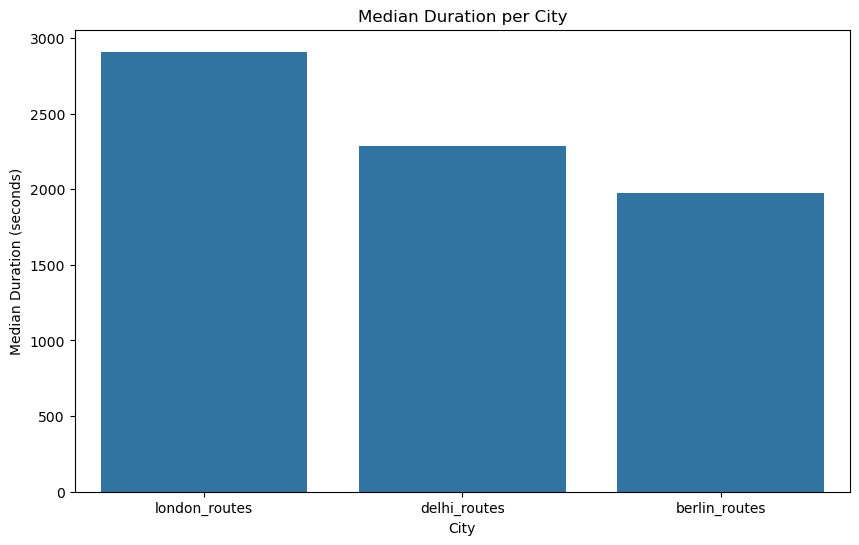

<Figure size 1000x600 with 0 Axes>

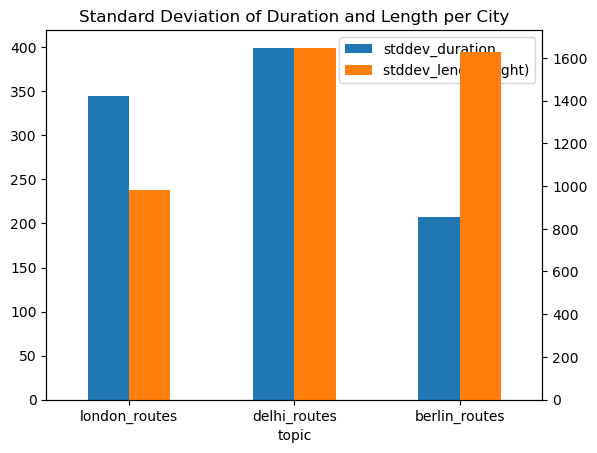

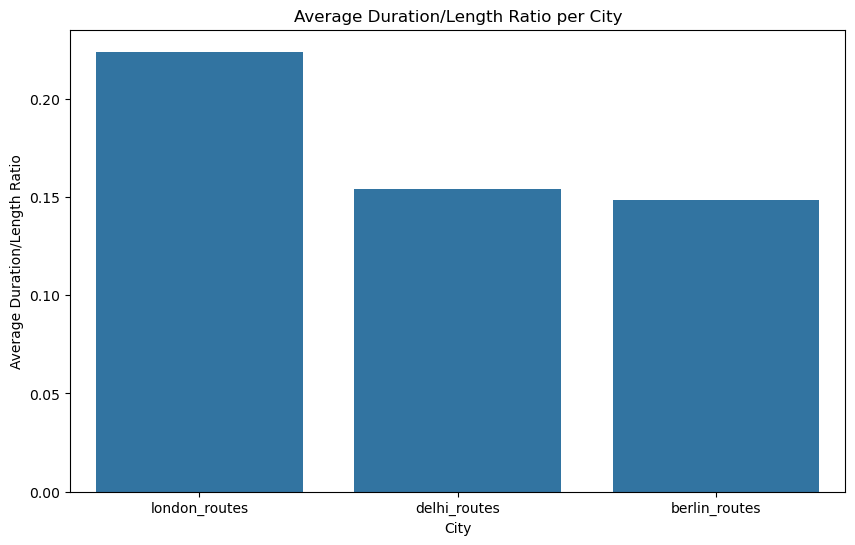

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisierung: Median Duration per City
plt.figure(figsize=(10, 6))
sns.barplot(x='topic', y='median_duration', data=pdf_median_duration)
plt.title('Median Duration per City')
plt.xlabel('City')
plt.ylabel('Median Duration (seconds)')
plt.show()

# Visualisierung: Standard Deviation of Duration and Length
plt.figure(figsize=(10, 6))
pdf_stddev_duration_length.plot(kind='bar', x='topic', secondary_y=['stddev_length'], rot=0)
plt.title('Standard Deviation of Duration and Length per City')
plt.xlabel('City')
plt.show()


# Visualisierung: Duration/Length Ratio
plt.figure(figsize=(10, 6))
sns.barplot(x='topic', y='avg_duration_length_ratio', data=pdf_ratio)
plt.title('Average Duration/Length Ratio per City')
plt.xlabel('City')
plt.ylabel('Average Duration/Length Ratio')
plt.show()


Die drei Diagramme vergleichen verschiedene Verkehrsmetriken für die Städte London, New Delhi und Berlin.

**Standardabweichung der Dauer und Länge pro Stadt**:

London: Die Standardabweichung der Dauer (blaue Balken) liegt bei etwa 1000 Sekunden, während die Standardabweichung der Länge (orange Balken) bei etwa 900 Einheiten liegt.

New Delhi: Die Standardabweichung der Dauer liegt bei etwa 800 Sekunden, während die Standardabweichung der Länge bei etwa 1000 Einheiten liegt.

Berlin: Die Standardabweichung der Dauer liegt bei etwa 700 Sekunden, während die Standardabweichung der Länge bei etwa 5000 Einheiten liegt.

Dieses Diagramm zeigt, dass London die größte Variabilität in der Dauer und eine hohe Variabilität in der Länge aufweist. Berlin hat die größte Variabilität in der Länge, während New Delhi eine moderate Variabilität in beiden Metriken aufweist.

**Median-Dauer pro Stadt**:

London: Die mittlere Dauer der Routen beträgt etwa 1750 Sekunden.

New Delhi: Die mittlere Dauer der Routen beträgt etwa 1600 Sekunden.

Berlin: Die mittlere Dauer der Routen beträgt etwa 1200 Sekunden.

Dieses Diagramm zeigt, dass London die längste mittlere Routenzeit hat, gefolgt von New Delhi und Berlin.

**Durchschnittliches Verhältnis von Dauer zu Länge pro Stadt**:

London: Hat das höchste durchschnittliche Verhältnis von Dauer zu Länge mit etwa 0,19.

New Delhi: Hat ein durchschnittliches Verhältnis von etwa 0,14.

Berlin: Hat ein durchschnittliches Verhältnis von etwa 0,15.

Dieses Diagramm zeigt, dass London das höchste Verhältnis von Routenzeit zu Streckenlänge hat, was auf einen höheren Verkehrsstauniveau oder ineffizientere Verkehrssysteme hinweisen könnte.


Zusammenfassend zeigen die Diagramme, dass London im Vergleich zu New Delhi und Berlin sowohl in Bezug auf die Variabilität der Routenlänge und -dauer als auch auf die durchschnittliche Routenzeit und das Verhältnis von Dauer zu Länge die höchsten Werte aufweist. Dies deutet darauf hin, dass der Verkehr in London tendenziell unberechenbarer und zeitaufwendiger ist. Berlin zeigt die größte Variabilität in der Routenlänge, während New Delhi in beiden Metriken moderate Werte aufweist.

Zuerst werden die Pandas DataFrames **pdf_median_duration**, **pdf_stddev_duration_length**, **pdf_transport_mode_proportions** und **pdf_ratio** in Spark DataFrames konvertiert. Anschließend wird das Pandas DataFrame **pdf_median_duration** in einer HDF5-Datei gespeichert.

In [54]:
df_median_duration = spark.createDataFrame(pdf_median_duration)
df_stddev_duration_length = spark.createDataFrame(pdf_stddev_duration_length)
#df_transport_mode_proportions = spark.createDataFrame(pdf_transport_mode_proportions)
df_ratio = spark.createDataFrame(pdf_ratio)

Zuerst wird das Pandas DataFrame **pdf_median_duration** in einer HDF5-Datei unter dem Verzeichnis **flat_files** gespeichert. Anschließend wird das Spark DataFrame **df_median_duration** im Parquet-Format im gleichen Verzeichnis gespeichert. Schließlich werden die Inhalte des Spark DataFrame **df_median_duration** angezeigt.

In [55]:
# Save Dataframe to HDF5 using Pandas
pdf_median_duration.to_hdf("flat_files/median_duration.h5", key='median_duration', mode='w')

In [56]:
# Save Dataframe to parquet file
df_median_duration.write.parquet("flat_files/median_duration.parquet")

In [57]:
df_median_duration.show()

+-------------+---------------+
|        topic|median_duration|
+-------------+---------------+
|london_routes|           2910|
| delhi_routes|           2285|
|berlin_routes|           1974|
+-------------+---------------+



In [ ]:
# Stop Spark session
spark.stop()